In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from api_keys import weather_api_key
from citipy import citipy
from scipy.stats import linregress

In [2]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "sauda"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&q=" + city
response = requests.get(query_url).json()
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=6b9fca5bb7167ca8e527ee04dc1ced14&q=sauda'

In [6]:
response

{'coord': {'lon': 6.35, 'lat': 59.65},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 289.26,
  'feels_like': 290.6,
  'temp_min': 289.26,
  'temp_max': 289.26,
  'pressure': 1012,
  'humidity': 99},
 'wind': {'speed': 0.9, 'deg': 271},
 'rain': {'1h': 0.48},
 'clouds': {'all': 100},
 'dt': 1592664202,
 'sys': {'type': 3,
  'id': 2015976,
  'country': 'NO',
  'sunrise': 1592619252,
  'sunset': 1592686694},
 'timezone': 7200,
 'id': 3140056,
 'name': 'Sauda',
 'cod': 200}

In [7]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

In [8]:
record_num = 1
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
city_name = []

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

for city in cities:
    try:
        new_record_num = record_num + 1
        data_json = requests.get(query_url + city).json()
        lat.append(data_json["coord"]["lat"])
        lng.append(data_json["coord"]["lon"])
        max_temp.append(data_json["main"]["temp_max"])
        cloudiness.append(data_json["clouds"]["all"])
        humidity.append(response["main"]["humidity"])
        wind_speed.append(data_json["wind"]["speed"])
        country.append(data_json["sys"]["country"])
        date.append(data_json["dt"])
        city_name.append(city)
        print(f"Processing Record {new_record_num} | {city}")
 
    except:
         print("City not found. Skipping...")

Processing Record 2 | tuatapere
Processing Record 2 | urumqi
Processing Record 2 | mataura
Processing Record 2 | san vicente
Processing Record 2 | iqaluit
Processing Record 2 | butaritari
Processing Record 2 | taunggyi
Processing Record 2 | avarua
Processing Record 2 | vila do maio
Processing Record 2 | albany
Processing Record 2 | grand forks
Processing Record 2 | cabo san lucas
Processing Record 2 | pevek
Processing Record 2 | atuona
Processing Record 2 | meulaboh
Processing Record 2 | provideniya
Processing Record 2 | new norfolk
Processing Record 2 | torbay
Processing Record 2 | punta arenas
Processing Record 2 | pio xii
Processing Record 2 | upernavik
Processing Record 2 | chuy
City not found. Skipping...
Processing Record 2 | port elizabeth
Processing Record 2 | khon buri
Processing Record 2 | rikitea
Processing Record 2 | fortuna
Processing Record 2 | santa isabel do rio negro
Processing Record 2 | kapaa
Processing Record 2 | saskylakh
City not found. Skipping...
Processing Reco

Processing Record 2 | katsuyama
Processing Record 2 | aswan
Processing Record 2 | oranjestad
Processing Record 2 | vila franca do campo
Processing Record 2 | kishcha
Processing Record 2 | cam ranh
Processing Record 2 | brae
Processing Record 2 | banda aceh
Processing Record 2 | san quintin
Processing Record 2 | young
Processing Record 2 | altay
Processing Record 2 | limbang
Processing Record 2 | asfi
Processing Record 2 | sao filipe
Processing Record 2 | yeppoon
Processing Record 2 | port lincoln
Processing Record 2 | san juan
Processing Record 2 | port augusta
Processing Record 2 | tanggu
Processing Record 2 | anqing
Processing Record 2 | merauke
Processing Record 2 | marawi
Processing Record 2 | puerto del rosario
City not found. Skipping...
Processing Record 2 | lazaro cardenas
Processing Record 2 | lorengau
Processing Record 2 | kaohsiung
Processing Record 2 | champerico
Processing Record 2 | corinto
Processing Record 2 | seoul
Processing Record 2 | maniitsoq
City not found. Skippi

Processing Record 2 | moyale
Processing Record 2 | yulara
Processing Record 2 | sur
Processing Record 2 | khash
Processing Record 2 | monrovia
Processing Record 2 | dunedin
Processing Record 2 | boguchany
Processing Record 2 | wanning
Processing Record 2 | oktyabrskoye
Processing Record 2 | sept-iles
Processing Record 2 | bulawayo
Processing Record 2 | millinocket
Processing Record 2 | deputatskiy
Processing Record 2 | nizhnyaya omka
Processing Record 2 | kieta
Processing Record 2 | snasa
Processing Record 2 | najran
Processing Record 2 | huanren
Processing Record 2 | pampa
Processing Record 2 | north bend
Processing Record 2 | ibra
Processing Record 2 | kenora
Processing Record 2 | sumbe
Processing Record 2 | camopi
Processing Record 2 | tautira
Processing Record 2 | wuwei
Processing Record 2 | ayr
City not found. Skipping...
Processing Record 2 | chunhuhub
Processing Record 2 | alappuzha
Processing Record 2 | miranda
Processing Record 2 | hachinohe
Processing Record 2 | bandarbeyla
P

In [9]:
# Convert Raw Data to DataFrame
# Export the city data into a .csv.
# Display the DataFrame

weather_dict = {"Cities" : city_name, "Latitude":lat, "Longitude":lng, "Temp" : max_temp, "Humidity": humidity,
                "Cloudiness": cloudiness, "Windspeed" : wind_speed, "Country":country, "Date": date}

weather_df = pd.DataFrame(weather_dict)
weather_df

,Cities,Latitude,Longitude,Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,tuatapere,-46.13,167.68,39.00,99,65,3.00,NZ,1592664245
1,urumqi,43.80,87.60,82.40,99,40,6.71,CN,1592664245
2,mataura,-46.19,168.86,39.00,99,54,3.00,NZ,1592664245
3,san vicente,-26.62,-54.13,77.32,99,23,7.94,AR,1592664245
4,iqaluit,63.75,-68.51,39.20,99,75,5.82,CA,1592664245
...,...,...,...,...,...,...,...,...,...
565,flin flon,54.77,-101.86,46.40,99,90,5.82,CA,1592664340
566,saint-francois,46.42,3.91,73.40,99,28,5.82,FR,1592664340
567,ongandjera,-17.88,15.07,74.07,99,53,3.29,NA,1592664340
568,indramayu,-6.33,108.32,80.60,99,97,9.53,ID,1592664340


In [7]:
# Inspect the data and remove the cities where the humidity > 100%
#  Get the indices of cities that have humidity over 100%.
update_df = weather_df[weather_df["Humidity"] > 100]
update_df

,Cities,Latitude,Longitude,Temp,Humidity,Cloudiness,Windspeed,Country,Date


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

In [10]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
weather_df.to_csv("output_data_file",index = False)

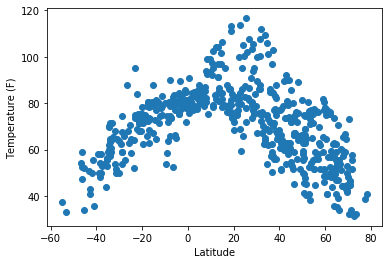

In [10]:
# Latitude vs. Temperature Plot
# Temperature (F) vs. Latitude
x_values = weather_df['Latitude']
y_values = weather_df['Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.show()

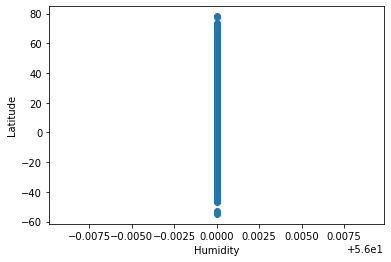

In [11]:
# Latitude vs. Humidity Plot
# Humidity (%) vs. Latitude
x_values = weather_df['Humidity']
y_values = weather_df['Latitude']
plt.scatter(x_values,y_values)
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.show()

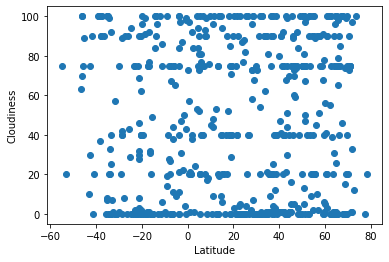

In [12]:
# Latitude vs. Cloudiness Plot
# Cloudiness (%) vs. Latitude
x_values = weather_df['Latitude']
y_values = weather_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

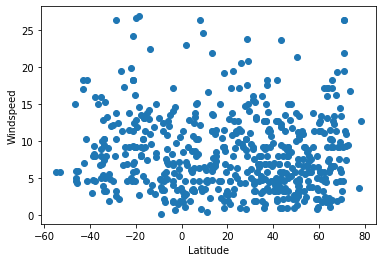

In [13]:
# Latitude vs. Wind Speed Plot
# Wind Speed (mph) vs. Latitude
x_values = weather_df['Latitude']
y_values = weather_df['Windspeed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
plt.show()

In [11]:
# Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude)
n_df = weather_df[weather_df["Latitude"] >= 0]
s_df = weather_df[weather_df["Latitude"] < 0]

In [12]:
def linear_reg(x_values, y_values, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)
    plt.show()

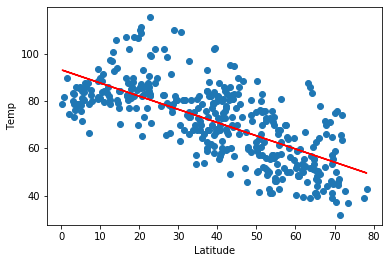

In [19]:
# Northern Hemisphere - Temperature (F) vs. Latitude
x_values = n_df["Latitude"]
y_values = n_df["Temp"]
linear_reg(x_values, y_values, "Temp")


In [ ]:
# Observation 1: The above is very well corelated. Seems to be even on both sides of the linear reg line. 
# I would say with confidence that there is a relationship between increasing latitude and decreasing temp

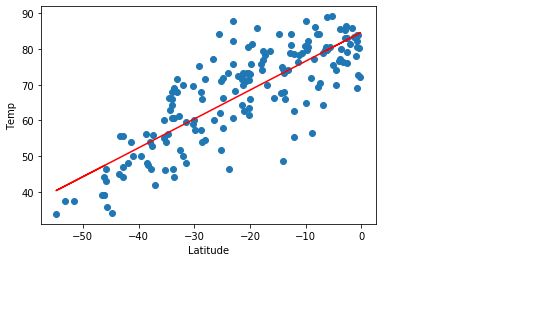

In [21]:
# Southern Hemisphere - Temperature (F) vs. Latitude
x_values = s_df["Latitude"]
y_values = s_df["Temp"]
linear_reg(x_values, y_values, "Temp")


In [16]:
# Observation 2: The above is also decently corelated. Not as even on each side of the line but close. 
# I would say  that there is a relationship between decreasing latitude and increasing temp

In [25]:
# Northern Hemisphere - Humidity (%) vs. Latitude
x_values = n_df["Latitude"]
y_values = n_df["Humidity"]
linear_reg(x_values, y_values, "Latitude")


ValueError: Image size of 405x637694 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

In [26]:
# Southern Hemisphere - Humidity (%) vs. Latitude
x_values = s_df["Humidity"]
y_values = s_df["Latitude"]
linear_reg(x_values, y_values, "Latitude")


C:\Users\SESA284039\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\SESA284039\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


ValueError: Image size of 1579646x301 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

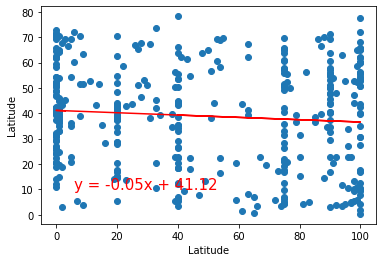

In [27]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude
x_values = n_df["Cloudiness"]
y_values = n_df["Latitude"]
linear_reg(x_values, y_values, "Latitude")

In [ ]:
# Observation 3: I would say no obvious relationship between cloudiness and latitude

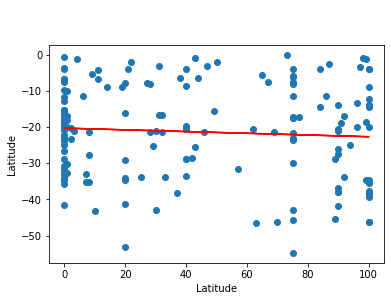

In [21]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude
x_values = s_df["Cloudiness"]
y_values = s_df["Latitude"]
linear_reg(x_values, y_values, "Latitude")

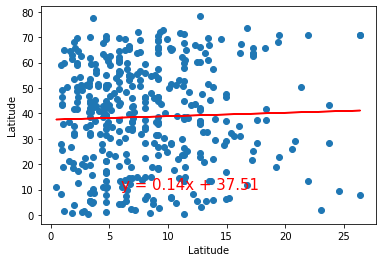

In [22]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude
x_values = n_df["Windspeed"]
y_values = n_df["Latitude"]
linear_reg(x_values, y_values, "Latitude")

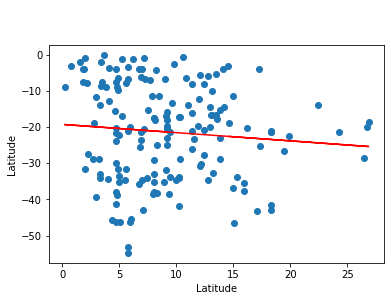

In [23]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude
x_values = s_df["Windspeed"]
y_values = s_df["Latitude"]
linear_reg(x_values, y_values, "Latitude")